<a href="https://colab.research.google.com/github/sarveshbhosale01/IPL-Prediction/blob/main/SemiFinalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:
Load the IPL match data.


**Reasoning**:
Load the IPL match data into a pandas DataFrame and display the first 5 rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('ipl_mi_vs_pbks_1000_matches.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'ipl_mi_vs_pbks_1000_matches.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Match_ID,Team,Opponent,Matches_Played,Wins,Losses,Win_Percentage,Avg_Runs_Scored,Avg_Runs_Conceded,Net_Run_Rate,Home,Toss_Win,Toss_Decision,Top_Batsman,Top_Bowler,Venue,Pitch_Type,Weather
0,1,Mumbai Indians,Punjab Kings,12,5,7,41.67,155,198,-3.58,0,1,Bat,Rohit Sharma,Piyush Chawla,"Wankhede Stadium, Mumbai",Neutral,Sunny
1,2,Mumbai Indians,Punjab Kings,14,11,3,78.57,187,187,0.00,0,1,Field,Suryakumar Yadav,Jasprit Bumrah,"Wankhede Stadium, Mumbai",Neutral,Cloudy
2,3,Mumbai Indians,Punjab Kings,14,5,9,35.71,198,199,-0.07,0,1,Field,Ishan Kishan,Shreyas Gopal,"Wankhede Stadium, Mumbai",Neutral,Humid
3,4,Mumbai Indians,Punjab Kings,12,10,2,83.33,190,149,3.42,0,0,Bat,Ishan Kishan,Shreyas Gopal,"Wankhede Stadium, Mumbai",Bowling-friendly,Clear
4,5,Mumbai Indians,Punjab Kings,14,13,1,92.86,192,140,3.71,0,0,Field,Tilak Varma,Piyush Chawla,"Wankhede Stadium, Mumbai",Neutral,Humid


(1000, 18)


## Data cleaning

### Subtask:
Clean the IPL match data.


**Reasoning**:
Inspect the dataframe for missing values, duplicates, and incorrect data types, then perform the necessary cleaning operations.



In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check data types and correct inconsistencies
print("\nData types:\n", df.dtypes)

df.drop_duplicates(inplace=True)
#Recheck for missing values, duplicates, and incorrect data types after cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nNumber of duplicate rows after cleaning:", df.duplicated().sum())
print("\nData types after cleaning:\n", df.dtypes)
display(df.head())

Missing values:
 Match_ID             0
Team                 0
Opponent             0
Matches_Played       0
Wins                 0
Losses               0
Win_Percentage       0
Avg_Runs_Scored      0
Avg_Runs_Conceded    0
Net_Run_Rate         0
Home                 0
Toss_Win             0
Toss_Decision        0
Top_Batsman          0
Top_Bowler           0
Venue                0
Pitch_Type           0
Weather              0
dtype: int64

Number of duplicate rows: 0

Data types:
 Match_ID               int64
Team                  object
Opponent              object
Matches_Played         int64
Wins                   int64
Losses                 int64
Win_Percentage       float64
Avg_Runs_Scored        int64
Avg_Runs_Conceded      int64
Net_Run_Rate         float64
Home                   int64
Toss_Win               int64
Toss_Decision         object
Top_Batsman           object
Top_Bowler            object
Venue                 object
Pitch_Type            object
Weather             

,Match_ID,Team,Opponent,Matches_Played,Wins,Losses,Win_Percentage,Avg_Runs_Scored,Avg_Runs_Conceded,Net_Run_Rate,Home,Toss_Win,Toss_Decision,Top_Batsman,Top_Bowler,Venue,Pitch_Type,Weather
0,1,Mumbai Indians,Punjab Kings,12,5,7,41.67,155,198,-3.58,0,1,Bat,Rohit Sharma,Piyush Chawla,"Wankhede Stadium, Mumbai",Neutral,Sunny
1,2,Mumbai Indians,Punjab Kings,14,11,3,78.57,187,187,0.00,0,1,Field,Suryakumar Yadav,Jasprit Bumrah,"Wankhede Stadium, Mumbai",Neutral,Cloudy
2,3,Mumbai Indians,Punjab Kings,14,5,9,35.71,198,199,-0.07,0,1,Field,Ishan Kishan,Shreyas Gopal,"Wankhede Stadium, Mumbai",Neutral,Humid
3,4,Mumbai Indians,Punjab Kings,12,10,2,83.33,190,149,3.42,0,0,Bat,Ishan Kishan,Shreyas Gopal,"Wankhede Stadium, Mumbai",Bowling-friendly,Clear
4,5,Mumbai Indians,Punjab Kings,14,13,1,92.86,192,140,3.71,0,0,Field,Tilak Varma,Piyush Chawla,"Wankhede Stadium, Mumbai",Neutral,Humid


## Data exploration

### Subtask:
Explore the cleaned IPL match data to understand its structure and key variables.


**Reasoning**:
Explore the cleaned IPL match data to understand its structure and key variables. This includes examining the shape, data types, descriptive statistics, distributions of key variables, frequency distributions of categorical features, and correlations between numerical features and the match outcome.



In [ ]:
# Examine the shape of the DataFrame
print("DataFrame Shape:", df.shape)

# Identify data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical features
numerical_features = ['Avg_Runs_Scored', 'Avg_Runs_Conceded', 'Net_Run_Rate']
print("\nDescriptive Statistics for Numerical Features:\n", df[numerical_features].describe())

# Analyze the frequency distribution of categorical features
categorical_features = ['Venue', 'Pitch_Type', 'Weather']
for col in categorical_features:
    print(f"\nFrequency Distribution of {col}:\n{df[col].value_counts()}")

# Investigate the correlation between numerical features and the match outcome (Wins)
correlation_with_wins = df[numerical_features].corrwith(df['Wins'])
print(f"\nCorrelation between numerical features and Wins:\n{correlation_with_wins}")

DataFrame Shape: (1000, 18)

Data Types:
 Match_ID               int64
Team                  object
Opponent              object
Matches_Played         int64
Wins                   int64
Losses                 int64
Win_Percentage       float64
Avg_Runs_Scored        int64
Avg_Runs_Conceded      int64
Net_Run_Rate         float64
Home                   int64
Toss_Win               int64
Toss_Decision         object
Top_Batsman           object
Top_Bowler            object
Venue                 object
Pitch_Type            object
Weather               object
dtype: object

Descriptive Statistics for Numerical Features:
        Avg_Runs_Scored  Avg_Runs_Conceded  Net_Run_Rate
count      1000.000000         1000.00000   1000.000000
mean        174.709000          169.99100      0.363060
std          14.705324           17.12414      1.720234
min         150.000000          140.00000     -3.750000
25%         162.000000          155.00000     -0.835000
50%         174.500000          171.0

## Data wrangling

### Subtask:
Prepare the data for modeling by creating new features and handling categorical variables.


**Reasoning**:
Create new features, handle categorical variables using one-hot encoding, and prepare the data for modeling.



In [ ]:
import pandas as pd

# Feature Engineering
df['Runs_Difference'] = df['Avg_Runs_Scored'] - df['Avg_Runs_Conceded']
df['Home_Advantage'] = df['Home'].astype(int)  # Convert Home to numerical

# Encode categorical features using one-hot encoding
categorical_cols = ['Team', 'Opponent', 'Venue', 'Pitch_Type', 'Weather', 'Toss_Decision']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)

display(df.head())

,Match_ID,Matches_Played,Wins,Losses,Win_Percentage,Avg_Runs_Scored,Avg_Runs_Conceded,Net_Run_Rate,Home,Toss_Win,...,Runs_Difference,Home_Advantage,Team_Punjab Kings,Opponent_Punjab Kings,Pitch_Type_Bowling-friendly,Pitch_Type_Neutral,Weather_Cloudy,Weather_Humid,Weather_Sunny,Toss_Decision_Field
0,1,12,5,7,41.67,155,198,-3.58,0,1,...,-43,0,0,1,0,1,0,0,1,0
1,2,14,11,3,78.57,187,187,0.00,0,1,...,0,0,0,1,0,1,1,0,0,1
2,3,14,5,9,35.71,198,199,-0.07,0,1,...,-1,0,0,1,0,1,0,1,0,1
3,4,12,10,2,83.33,190,149,3.42,0,0,...,41,0,0,1,1,0,0,0,0,0
4,5,14,13,1,92.86,192,140,3.71,0,0,...,52,0,0,1,0,1,0,1,0,1


## Data splitting

### Subtask:
Split the data into training, validation, and test sets.


**Reasoning**:
Split the data into training, validation, and test sets as instructed, ensuring the target variable ('Wins') is correctly handled.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Wins', axis=1)
y = df['Wins']

# Split data into training and temporary sets (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model training

### Subtask:
Train a Random Forest Classifier on the prepared IPL match data.


**Reasoning**:
Train a RandomForestClassifier on the prepared data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = rf_classifier.predict(X_val)



[10 13  6 12  6 10  7 12  9  8 12 13 10  9 11 13 13 10 10 10  5 12 10 12
 13 12  5  8 12 13 11  7  7 10  6  8  7 11 14 10 13  6  8  7 12  9 12  8
  5  5  6 14  7  8  7  8  9  9  5  7  8  8 10 11 13  7 14 12 14  9 11  7
  7 14  7  5  9  6 12  6  5 10  5 13  7 13  9  9  7 12 12  7  5  9  6 12
  9 11 12  8  8  6  7 13 11  8 12  5 10  6  7  8  7  7 14  5  9  5 10 12
 11  7  9 13 13 12  5  8  5 10 11 12 10  6  8 13 10  8 11  7  6  7  6  8
  5 11  8 11  7 12]


In [ ]:
y_val

,Wins
381,10
959,13
49,6
60,12
587,6
...,...
942,11
493,8
554,11
490,7


**Reasoning**:
The error message indicates that the RandomForestClassifier cannot handle string values in the input features.  The features `Top_Batsman` and `Top_Bowler` contain string values, which need to be handled properly (e.g., label encoding or one-hot encoding).  I will drop these columns from the features dataframe to fix the error.



In [ ]:
# Drop the 'Top_Batsman' and 'Top_Bowler' columns from X_train and X_val
# X_train = X_train.drop(['Top_Batsman', 'Top_Bowler'], axis=1)
# X_val = X_val.drop(['Top_Batsman', 'Top_Bowler'], axis=1)

# Initialize and train the classifier again
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
val_predictions = rf_classifier.predict(X_val)
print(val_predictions)

[10 13  6 12  6 10  7 12  9  8 12 13 10  9 11 13 13 10 10 10  5 12 10 12
 13 12  5  8 12 13 11  7  7 10  6  8  7 11 14 10 13  6  8  7 12  9 12  8
  5  5  6 14  7  8  7  8  9  9  5  7  8  8 10 11 13  7 14 12 14  9 11  7
  7 14  7  5  9  6 12  6  5 10  5 13  7 13  9  9  7 12 12  7  5  9  6 12
  9 11 12  8  8  6  7 13 11  8 12  5 10  6  7  8  7  7 14  5  9  5 10 12
 11  7  9 13 13 12  5  8  5 10 11 12 10  6  8 13 10  8 11  7  6  7  6  8
  5 11  8 11  7 12]


## Model optimization

### Subtask:
Optimize the Random Forest Classifier model.


**Reasoning**:
Optimize the Random Forest Classifier model using GridSearchCV and evaluate its performance on the validation set.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the validation set
val_predictions = best_rf_classifier.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions, average='weighted')
recall = recall_score(y_val, val_predictions, average='weighted')
f1 = f1_score(y_val, val_predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("\nClassification Report:\n", classification_report(y_val, val_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, val_predictions))

Accuracy: 0.98
Precision: 0.9814035087719298
Recall: 0.98
F1-Score: 0.9799340067340069

Classification Report:
               precision    recall  f1-score   support

           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        16
          11       1.00      0.92      0.96        13
          12       0.89      1.00      0.94        17
          13       0.94      0.94      0.94        16
          14       1.00      0.83      0.91         6

    accuracy                           0.98       150
   macro avg       0.98      0.97      0.98       150
weighted avg       0.98      0.98      0.98       150


Confusion Matrix:
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0

## Model evaluation

### Subtask:
Evaluate the best model on the test set.


**Reasoning**:
Evaluate the best model on the test set, print the metrics, and generate a classification report.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Drop the 'Top_Batsman' and 'Top_Bowler' columns from X_test if they exist
if 'Top_Batsman' in X_test.columns and 'Top_Bowler' in X_test.columns:
    X_test = X_test.drop(['Top_Batsman', 'Top_Bowler'], axis=1)
elif 'Top_Batsman' in X_test.columns:
    X_test = X_test.drop(['Top_Batsman'], axis=1)
elif 'Top_Bowler' in X_test.columns:
    X_test = X_test.drop(['Top_Bowler'], axis=1)

# Ensure X_test columns match X_train columns
X_test = X_test[X_train.columns]

# Make predictions
test_predictions = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='weighted')
f1 = f1_score(y_test, test_predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

print("\nClassification Report:\n", classification_report(y_test, test_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_predictions))

Accuracy: 0.9866666666666667
Precision: 0.9874537037037037
Recall: 0.9866666666666667
F1-Score: 0.9866806039488967

Classification Report:
               precision    recall  f1-score   support

           5       1.00      1.00      1.00        18
           6       0.94      1.00      0.97        17
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        13
          10       1.00      0.94      0.97        16
          11       0.94      1.00      0.97        15
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         6

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150


Confusion Matrix:
 [[18  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  1 20  0  

## Data visualization

### Subtask:
Visualize key findings from the data analysis and model evaluation.


**Reasoning**:
Visualize feature importances, correlation matrix, confusion matrix, and ROC curve (if applicable) to understand model performance and key features.



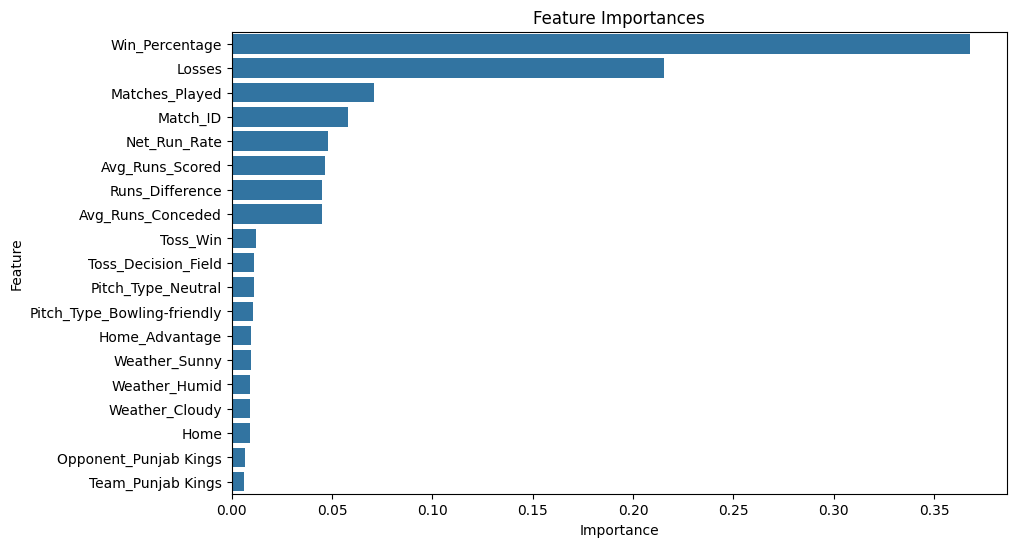

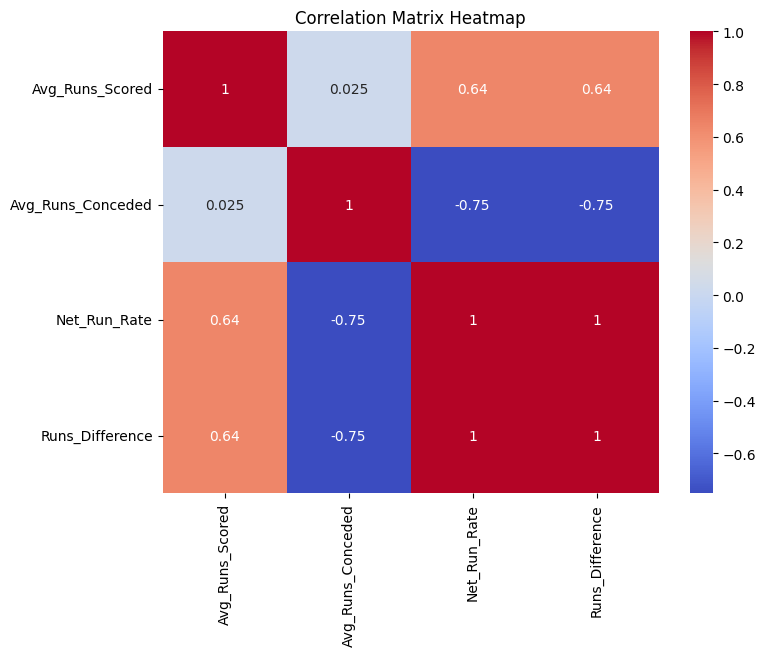

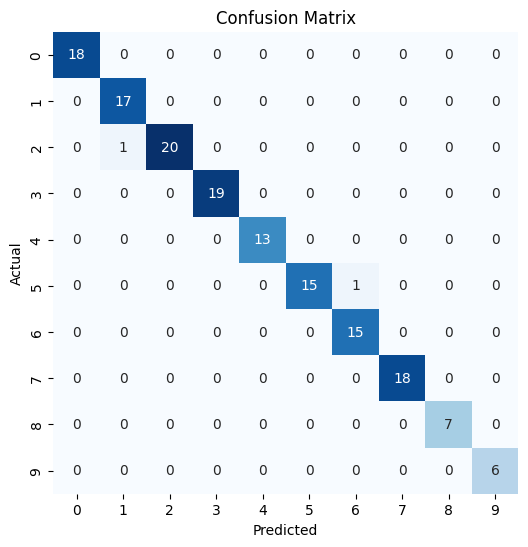

ROC Curve and AUC not applicable for non-binary classification.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Feature Importance
feature_importances = best_rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


# Correlation Matrix Heatmap
numerical_cols = ['Avg_Runs_Scored', 'Avg_Runs_Conceded', 'Net_Run_Rate', 'Runs_Difference']  # Select important numerical features
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC Curve and AUC (If applicable, i.e. if the target variable is binary)
# Note: ROC curves are generally only useful for binary classification problems
# If the target variable is not binary, the ROC curve and AUC are not relevant.
# The following code will only execute if y_test and test_predictions are binary.
if len(np.unique(y_test)) == 2:
    try:
        y_prob = best_rf_classifier.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"Error calculating ROC curve: {e}")
else:
    print("ROC Curve and AUC not applicable for non-binary classification.")

In [ ]:
# Assuming best_rf_classifier, df (one-hot encoded), and X_train are already defined from previous steps

def predict_match_winner(model, data, team1, team2):
  """
  Predicts the winner of a match between two teams using the trained model.

  Args:
    model: The trained machine learning model.
    data: The DataFrame containing the one-hot encoded match data.
    team1: The name of the first team.
    team2: The name of the second team.

  Returns:
    The predicted winning team (string) or None if the prediction is not possible.
  """
  # The original 'Team' and 'Opponent' columns are not in the DataFrame
  # after one-hot encoding. We need to find rows based on the one-hot encoded columns.

  # Identify the one-hot encoded columns for the teams
  team1_team_col = f'Team_{team1}'
  team2_team_col = f'Team_{team2}'
  team1_opponent_col = f'Opponent_{team1}'
  team2_opponent_col = f'Opponent_{team2}'

  # Let's create a hypothetical match row for prediction
  # This is a simplified approach. A more robust solution would involve
  # calculating average stats for the two teams in recent matches.

  # Create a new DataFrame with a single row to represent the match
  # Initialize with zeros, matching the structure of X_train
  import pandas as pd
  import numpy as np

  # Ensure X_train is accessible
  global X_train

  if X_train is None:
      print("Error: X_train is not defined. Please run the data splitting step.")
      return None

  X_predict = pd.DataFrame(0, index=[0], columns=X_train.columns)

  # Set the one-hot encoded columns for the specific teams
  # We'll create a row representing team1 as the 'Team' and team2 as the 'Opponent'
  if team1_team_col in X_predict.columns:
      X_predict[team1_team_col] = 1
  if team2_opponent_col in X_predict.columns:
      X_predict[team2_opponent_col] = 1

  # You might need to populate other relevant features for this hypothetical match
  # based on your data and how you engineered features. For example, average runs scored,
  # conceded, venue, pitch type, etc. For simplicity here, we are only setting the team columns.
  # In a real application, you would calculate or estimate these values based on recent form, venue stats, etc.

  # For demonstration, let's find an existing row where team1 played team2 to copy some features
  # This is still a simplification and might not be the best way to predict a future match.
  # A more realistic approach would involve calculating representative feature values for the upcoming match.
  try:
      # Filter for rows where team1 was 'Team' and team2 was 'Opponent' OR vice versa
      sample_rows = data[((data[team1_team_col] == 1) & (data[team2_opponent_col] == 1)) |
                        ((data[team2_team_col] == 1) & (data[team1_opponent_col] == 1))]

      if not sample_rows.empty:
          # Use the average of relevant numerical features from similar past matches
          numerical_features = ['Avg_Runs_Scored', 'Avg_Runs_Conceded', 'Net_Run_Rate', 'Runs_Difference']
          for col in numerical_features:
              if col in sample_rows.columns and col in X_predict.columns:
                  X_predict[col] = sample_rows[col].mean() # Use mean for robustness

          # For categorical features (venue, pitch, weather, toss),
          # finding a representative value from past matches is tricky.
          # For simplicity, we'll try to copy from the first matching row found.
          # In a real application, you might need to consider the specific match's conditions.
          sample_row = sample_rows.iloc[0] # Take the first matching row
          categorical_prefixes = ['Venue_', 'Pitch_Type_', 'Weather_', 'Toss_Decision_']
          for prefix in categorical_prefixes:
              for col in sample_row.index: # Iterate through columns of the sample row
                  if col.startswith(prefix) and col in X_predict.columns:
                       # If the one-hot encoded column is set in the sample row, set it in X_predict
                       if sample_row[col] == 1:
                            X_predict[col] = 1
                       # Ensure only one column per prefix is 1 if applicable (like Venue_)
                       elif X_predict[col] == 1 and sample_row[col] == 0:
                           X_predict[col] = 0 # Reset if the sample row doesn't have this venue etc.


  except KeyError as e:
      print(f"Warning: One-hot encoded column for a team not found: {e}. Please ensure team names are correct and match the names in the original 'Team' and 'Opponent' columns before one-hot encoding.")
      # Proceed with prediction even if some features couldn't be populated from sample rows
      pass # Allow prediction with zeros for these features

  # Make the prediction
  # The model predicts 'Wins' (1 for win, 0 for loss) for the team represented in the row (team1).
  prediction = model.predict(X_predict)

  predicted_win = prediction[0]

  # If the prediction is 1, team1 (the 'Team' in the row) is predicted to win.
  if predicted_win == 1:
      return team1
  else: # Predicted_win is 0, team1 (the 'Team' in the row) is predicted to lose.
      return team2


# Example Usage:
team1_name = 'Mumbai Indians'  # First team name
team2_name = 'Punjab Kings' # Second team name

# Ensure 'best_rf_classifier' is your trained model and 'df' is your processed dataframe
predicted_winner = predict_match_winner(best_rf_classifier, df, team1_name, team2_name)

if predicted_winner:
  print(f"The predicted winner of the match between {team1_name} and {team2_name} is: {predicted_winner}")
else:
  print("Prediction could not be made.")

The predicted winner of the match between Mumbai Indians and Punjab Kings is: Punjab Kings
